In [1]:
import numpy as np
import matplotlib.pyplot as plt

import Beams
import Graph
import HHG

In [31]:
IR = Beams.Beam(w0=50e-6, lam=800e-9)

grid = IR.Grid(Lx=1e-3, Ly=1e-3, Nx=300, Ny=300)

test = IR.SU2(*grid, z=2*IR.zR, alpha=np.pi/2, beta=np.pi/2, phi=0, n0=0, m0=1, l0=0, p=5, q=0, N=5)


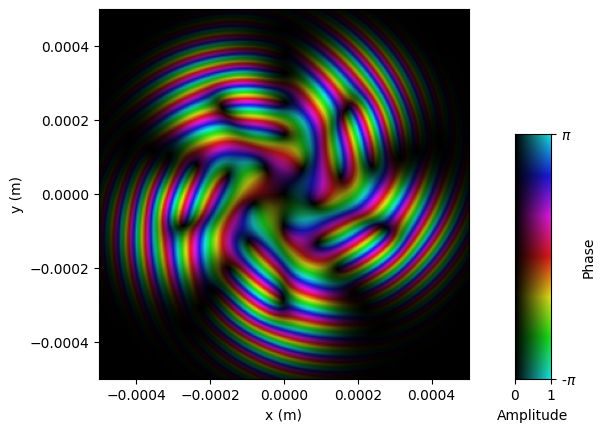

In [32]:
%matplotlib inline
Graph.ShowFieldPhase(test, grid)
plt.show()

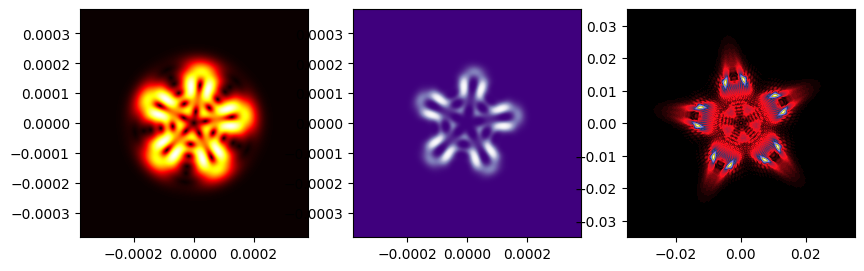

In [29]:
IR = Beams.Beam(w0=50e-6, lam=800e-9)
AG = HHG.ActiveGrating(qeff=3.5)
q=15
XUV = Beams.Beam(w0=1e-6, lam=IR.lam/q)

grid = XUV.FocusGrid(Lx=7e-2, Ly=7e-2, Nx=1000, Ny=1000, d=1)
#test = IR.LGBeam(*grid, z=0, l=2, p=0)
test = IR.SU2(*grid, z=0*IR.zR, alpha=np.pi/2, beta=np.pi/2, phi=0, n0=0, m0=1, l0=0, p=5, q=0, N=5)


XUV_NF = AG.Hq_NearField(IRfield=test, q=q)
XUV_FF, grid_FF = XUV.Fraunhofer(field_0=XUV_NF, grid_0=grid, d=1)

Graph.ShowHHG(IRfield=test, XUV_NF=XUV_NF, XUV_FF=XUV_FF, grid_NF=grid, grid_FF=grid_FF)
plt.show()

In [30]:
%matplotlib qt
Graph.ShowField(XUV_FF, grid_FF)
plt.show()